In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

In [16]:
data = pd.read_csv('data_part1.csv', index_col=0)

In [17]:
data

,id,gender,season,age,tripletsOfMonths,commonRed,commonGreen,commonBlue
0,15970,Men,Fall,2,4,254,254,90
1,39386,Men,Summer,2,3,40,53,59
2,59263,Women,Winter,2,1,234,234,234
3,21379,Men,Fall,2,4,50,50,52
4,53759,Men,Summer,2,3,0,0,0
...,...,...,...,...,...,...,...,...
44441,17036,Men,Summer,2,3,241,242,234
44442,6461,Men,Summer,2,3,223,220,213
44443,18842,Men,Fall,2,4,144,191,221
44444,46694,Women,Spring,2,2,253,253,253


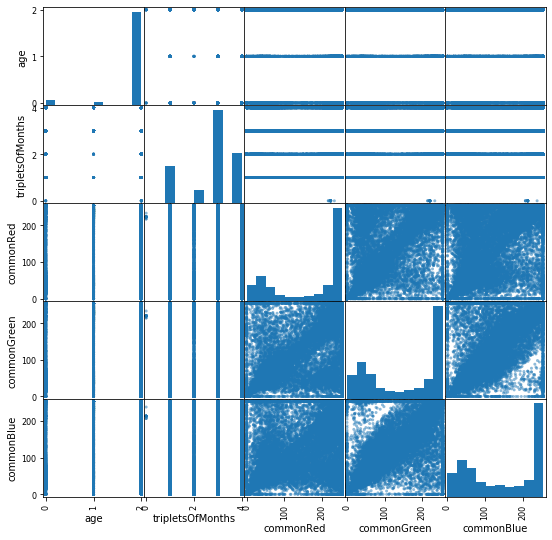

In [25]:
numerical_data = data[['age', 'tripletsOfMonths', 'commonRed', 'commonGreen', 'commonBlue']]
pd.plotting.scatter_matrix(numerical_data, figsize=(9,9))
plt.show()

# not much correlation between data that I can really see at this point. Will try to improve visibility

In [27]:
# first center the data by subtracting the mean
mean = numerical_data.mean()
d_centered = numerical_data - mean

In [28]:
# apply SVD to find # 'most import columns'
u, s, vt = np.linalg.svd(d_centered)

In [29]:
s/np.sqrt(len(numerical_data.columns)-1)
# looks first dimnension has most variance with some in second and third
# will grab 3 and do tests on them

array([15875.5012556 ,  5674.56510506,  3631.68638536,   108.22469712,
          48.30352135])

In [31]:
from sklearn.decomposition import PCA
pca_3 = PCA(n_components=3)

In [33]:
pca_3.fit(d_centered)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [37]:
print(pca_3.singular_values_)

[31751.00251119 11349.13021013  7263.37277072]


In [40]:
print(pca_3.explained_variance_ratio_)
# should add up to around 1 
print(np.sum(pca_3.explained_variance_ratio_))
# .99 % of the variance comes these 3 dimensions

[0.84734878 0.10826111 0.04434289]
0.9999527769248363


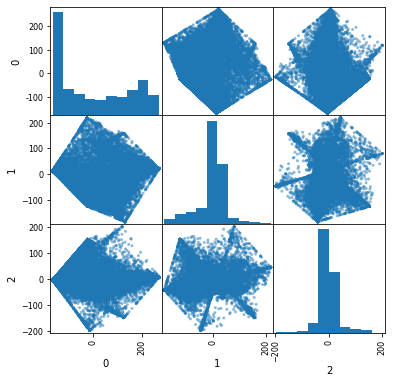

In [43]:
#transpose all 3 dimensions since almost all meaningful data exists there and plot
Dtrans_3 = pd.DataFrame(pca_3.transform(d_centered))
pd.plotting.scatter_matrix(Dtrans_3, figsize=(6,6))
plt.show()

### Theory behind this.

Since there are 3 columns of color (commonRed, commonGreen, commonBlue), these are 'overpowering' the other values. These 3 make up more than half of the variables and are similiar in values (kinda like overloading the importance of these values). Since each column ranges from 0-255, it creates a sphere in 'color dimension', sort of say.

These columns would be the 'high variance'. It's where most of the data lies. In this case, the tripletsOfMonth and age would be the 'noise', the values that are accounting for less of the data. 